###Importing Necessary Libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

###Uploading the Dataset from UCI Library

In [49]:
dataa = pd.read_csv('Shilldataset.csv')
dataa.head()

,Record_ID,Auction_ID,Bidder_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,1,732,_***i,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,2,732,g***r,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,3,732,t***p,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,4,732,7***n,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,5,900,z***z,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


###Pre-Processing of Dataset

In [50]:
dataa.shape

(6321, 13)

In [51]:
dataa.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

<Axes: xlabel='Class', ylabel='count'>

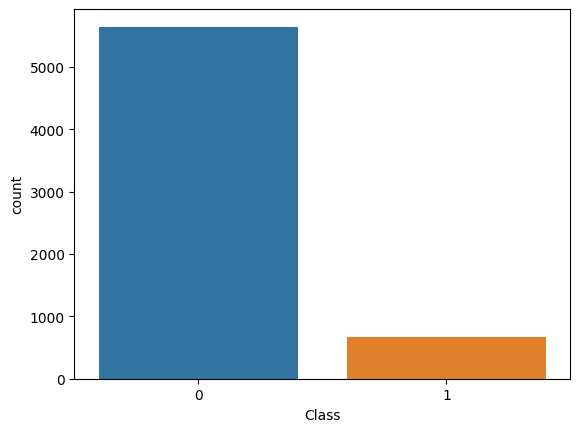

In [52]:
sns.countplot(x = 'Class', data=dataa)

In [53]:
dataa = dataa.drop(['Bidder_ID'],axis=1)
X = dataa.iloc[:,0:-1]
y = dataa['Class']

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [54]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [55]:
samples

[(      Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
  2140       5119         781         0.058824       0.111111   
  1285       3042         675         0.033708       0.200000   
  6018      14402        1683         0.375000       0.187500   
  6083      14547        1923         0.029851       0.090909   
  689        1619        1847         0.022727       0.030303   
  ...         ...         ...              ...            ...   
  4931      11731        1980         0.400000       0.040816   
  3264       7832         376         0.003021       0.166667   
  1653       3953        1414         0.020000       0.028571   
  2607       6187         137         0.500000       0.074074   
  2732       6500         843         0.028571       0.052632   
  
        Successive_Outbidding  Last_Bidding  Auction_Bids  \
  2140                    0.0      0.387770      0.000000   
  1285                    0.5      0.405941      0.000000   
  6018                    0.0     

### Creation of a Fitness Function

In [56]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [57]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1500)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [58]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 12)
    gamma = np.random.uniform(0, 12)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  10.19 Best Epsilon =  11.11
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  1.8 Best Epsilon =  10.54
Best Accuracy =  0.89 Best Kernel =  sigmoid Best Nu =  6.79 Best Epsilon =  8.62
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  0.27 Best Epsilon =  6.71
Best Accuracy =  0.9 Best Kernel =  sigmoid Best Nu =  10.76 Best Epsilon =  0.4
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  8.49 Best Epsilon =  6.51
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  10.33 Best Epsilon =  9.09
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  3.52 Best Epsilon =  5.37
Best Accuracy =  0.9 Best Kernel =  rbf Best Nu =  11.14 Best Epsilon =  10.3
Best Accuracy =  0.89 Best Kernel =  rbf Best Nu =  4.35 Best Epsilon =  6.64


###Creation of a Result Table

In [59]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.90,rbf,10.19,11.11
1,2,0.90,rbf,1.80,10.54
2,3,0.89,sigmoid,6.79,8.62
3,4,0.90,rbf,0.27,6.71
4,5,0.90,sigmoid,10.76,0.40
5,6,0.90,rbf,8.49,6.51
6,7,0.90,rbf,10.33,9.09
7,8,0.90,rbf,3.52,5.37
8,9,0.90,rbf,11.14,10.30
9,10,0.89,rbf,4.35,6.64


### Plotting of the Convergence Graph/Linear Curve

In [60]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [61]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [62]:
train_sizes

array([  39,  120,  200,  281,  361,  441,  522,  602,  683,  763,  844,
        924, 1004, 1085, 1165, 1246, 1326, 1407, 1487, 1568, 1648, 1728,
       1809, 1889, 1970, 2050, 2131, 2211, 2291, 2372, 2452, 2533, 2613,
       2694, 2774, 2854, 2935, 3015, 3096, 3176, 3257, 3337, 3417, 3498,
       3578, 3659, 3739, 3820, 3900, 3981])

In [63]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

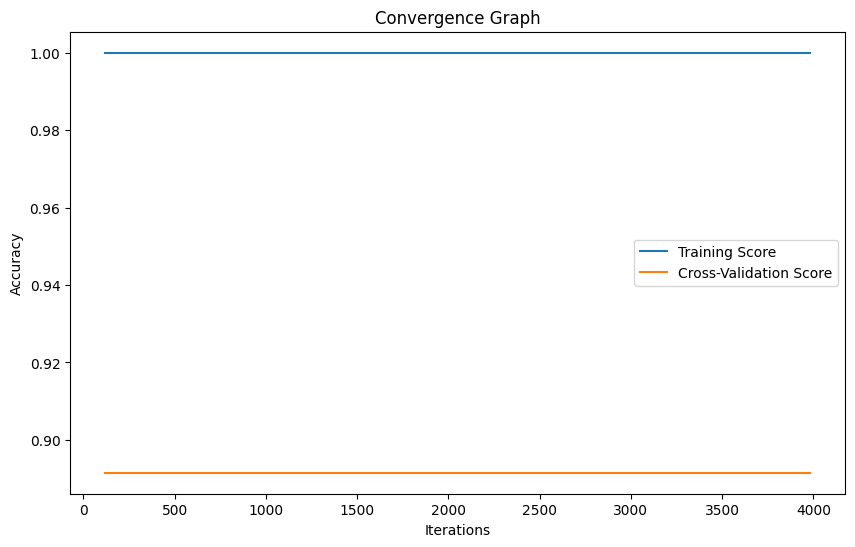

In [64]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()